
# <center style="color:red;font-weight:bold;">Clothes Size Prediction</center>

### <center style="color:red;font-weight:bold;">Using Machine Learning</center>

<center><img src = "clothes.jpg" width=45%></center>

### Columns Descriptions:

* **age** - Age of a person

* **height** - Height of a person in cm

* **weight** - Weight of a person in kg

* **sex** - Gender of a person

* **size** - Size of the clothes required for a person

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

: 

Data Loading

In [2]:
df = pd.read_csv("clothes_size.csv")
df.head()

age  height  weight  size     sex
0   9.0    56.0   105.0     1  Female
1   9.0    16.0    90.0     1  Female
2  27.0    88.0   375.0     7    Male
3  83.0    64.0   120.0     5  Female
4  82.0   112.0    45.0     7    Male

In [3]:
print("Number of Samples:", len(df))

Number of Samples: 20000


Statistical Summary of the dataframe

In [4]:
df.describe()

age        height        weight          size
count  19997.000000  19994.000000  19992.000000  20000.000000
mean      69.635745     64.331700    109.809424      3.836750
std       56.507650     46.433796     87.252390      1.864155
min        1.000000      0.000000      0.000000      1.000000
25%       27.000000     24.000000     45.000000      2.000000
50%       58.000000     56.000000     90.000000      3.000000
75%       97.000000     88.000000    150.000000      5.000000
max      295.000000    232.000000    450.000000      7.000000

Datatypes of each columns

In [5]:
df.dtypes

age       float64
height    float64
weight    float64
size        int64
sex        object
dtype: object

Missing values in each columns

In [6]:
df.isna().sum()

age       3
height    6
weight    8
size      0
sex       6
dtype: int64

### <font color="red"> Feature Engineering

In [7]:
df.head()

age  height  weight  size     sex
0   9.0    56.0   105.0     1  Female
1   9.0    16.0    90.0     1  Female
2  27.0    88.0   375.0     7    Male
3  83.0    64.0   120.0     5  Female
4  82.0   112.0    45.0     7    Male

Dimension of the dataset

In [8]:
df.shape

(20000, 5)

In [9]:
df.sex = df.sex.replace({"Male":1, "Female":0})
df.sex.value_counts()

0.0    10071
1.0     9923
Name: sex, dtype: int64

In [10]:
df.dtypes

age       float64
height    float64
weight    float64
size        int64
sex       float64
dtype: object

In [11]:
features = df.drop(columns=["size"], axis=1)
target = df["size"]
y = target

Handle missing values in numerical features

In [12]:
from sklearn.impute import SimpleImputer

# select numeric features
numeric = features.select_dtypes(include=["float", "int"])
num_cols = numeric.columns
# imputer
n_impute = SimpleImputer(strategy="mean")

# imputing missing values
data = n_impute.fit_transform(numeric)
numerical_df = pd.DataFrame(data, columns=num_cols)

# display imputed df
numerical_df.head()

age  height  weight  sex
0   9.0    56.0   105.0  0.0
1   9.0    16.0    90.0  0.0
2  27.0    88.0   375.0  1.0
3  83.0    64.0   120.0  0.0
4  82.0   112.0    45.0  1.0

In [13]:
numerical_df.height.min()

0.0

Feature Scaling - Numerical features

* *Robust Scaler* -> robust to outliers.

In [14]:
from sklearn.preprocessing import RobustScaler, StandardScaler

outliers = RobustScaler()
scaler = StandardScaler()

scaled_data = outliers.fit_transform(numerical_df)
scaled_data = scaler.fit_transform(scaled_data)
X = pd.DataFrame(scaled_data, columns=num_cols)
X.head()

age    height    weight       sex
0 -1.073161 -0.179463 -0.055133 -0.992774
1 -1.073161 -1.041056 -0.227087 -0.992774
2 -0.754588  0.509811  3.040034  1.007581
3  0.236527 -0.007145  0.116821 -0.992774
4  0.218829  1.026766 -0.742948  1.007581

Splitting the Dataset into Train and Test sets

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (16000, 4)
y_train shape:  (16000,)
x_test shape:  (4000, 4)
y_test shape:  (4000,)


## <font color="red"> Classification Algorithms

* Logistic Regression

* Decision Tree

### 1. K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train, y_train)

# Make a prediction
knn_pred = knn.predict(x_test)

print("Actual Labels:", y_test[:10])
print("Predicted Labels:", knn_pred[:10])

Actual Labels: 10650    4
2041     5
8668     3
1114     4
13902    1
11963    3
11072    2
3002     3
19771    2
8115     7
Name: size, dtype: int64
Predicted Labels: [7 5 3 3 4 3 2 3 2 7]


Accuracy of the Logistic Regression

In [17]:
knn_acc = round(accuracy_score(y_test, knn_pred), 4)

print("K-Nearest Classifier Accuracy:", knn_acc)

K-Nearest Classifier Accuracy: 0.5395


### 3. Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

# Make a prediction
rf_pred = rf.predict(x_test)

print("Actual Labels:", y_test[:10])
print("Predicted Labels:", rf_pred[:10])

Actual Labels: 10650    4
2041     5
8668     3
1114     4
13902    1
11963    3
11072    2
3002     3
19771    2
8115     7
Name: size, dtype: int64
Predicted Labels: [4 5 3 4 1 3 2 3 2 4]


### Accuracy of RandomForest Classifier

In [19]:
rf_acc = round(accuracy_score(y_test, rf_pred), 4)

print("Random-Forest Accuracy:", rf_acc)

Random-Forest Accuracy: 0.8188


### <font color="red"> Creating with Pipeline

In [20]:
features.head()

age  height  weight  sex
0   9.0    56.0   105.0  0.0
1   9.0    16.0    90.0  0.0
2  27.0    88.0   375.0  1.0
3  83.0    64.0   120.0  0.0
4  82.0   112.0    45.0  1.0

In [21]:
# Numeric columns
numeric_cols = features.select_dtypes(include=["int","float"]).columns
print(numeric_cols)

Index(['age', 'height', 'weight', 'sex'], dtype='object')


Creating Pre-processing Pipeline

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [23]:
from sklearn.pipeline import Pipeline

# preprocessing for numeric columns
num_transformer = Pipeline(steps=
    [
        ("imputeN", SimpleImputer(strategy="mean")),
        ("outliers", RobustScaler()),
        ("scaler", StandardScaler())
    ]
)

num_transformer

Pipeline(steps=[('imputeN', SimpleImputer()), ('outliers', RobustScaler()),
                ('scaler', StandardScaler())])

Applying Transformer

In [24]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=
    [
        ("numeric", num_transformer, numeric_cols)
    ]
)

preprocessing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer()),
                                                 ('outliers', RobustScaler()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'height', 'weight', 'sex'], dtype='object'))])

Add estimator to the pipeline

In [25]:
from sklearn.ensemble import RandomForestClassifier

# create logistic regression model
rf_estimator = RandomForestClassifier()

rf_model = Pipeline(steps=
                     [
                         ("preprocessing", preprocessing),
                         ("estimator", rf_estimator)
                     ])

rf_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   RobustScaler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'height', 'weight', 'sex'], dtype='object'))])),
                ('estimator', RandomForestClassifier())])

Train Pipeline model

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, stratify=y, random_state=42)

In [27]:
from sklearn import set_config

# train pipeline model
set_config(display="diagram")
rf_model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   RobustScaler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'height', 'weight', 'sex'], dtype='object'))])),
                ('estimator', RandomForestClassifier())])

Confusion Matrix - RandomForest Classifier

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, color):
    
    plt.figure(figsize=(10, 10))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=color)

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    
    plt.show()

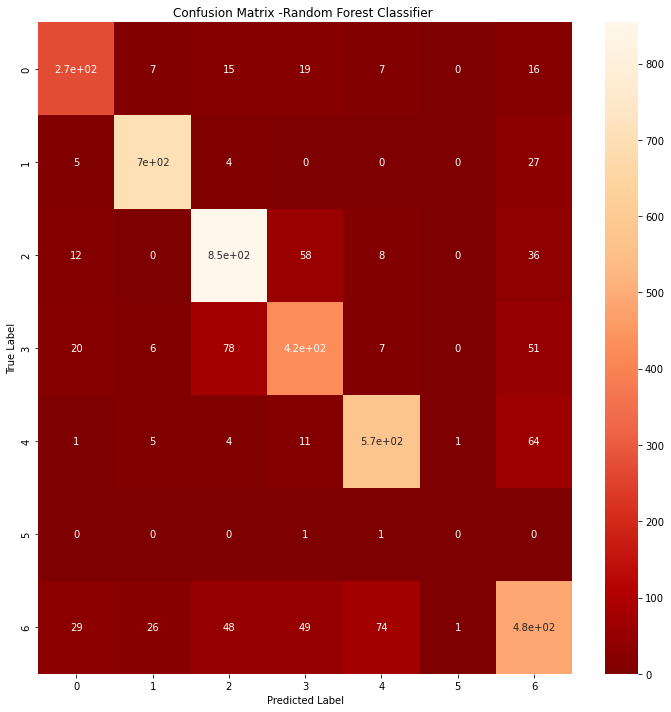

In [29]:
plot_confusion_matrix(Y_test, rf_model.predict(X_test), "Confusion Matrix -Random Forest Classifier ", "OrRd_r")

In [30]:
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

In [31]:
# Make a prediction
y_pred = rf_model.predict(X_test)

# Summarize the fit of the model
report = classification_report(Y_test, y_pred)
print(report)

plt.show()

              precision    recall  f1-score   support

           1       0.80      0.81      0.81       336
           2       0.94      0.95      0.95       737
           3       0.85      0.88      0.87       968
           4       0.75      0.72      0.74       586
           5       0.86      0.87      0.86       660
           6       0.00      0.00      0.00         2
           7       0.71      0.68      0.70       711

    accuracy                           0.83      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.83      0.83      0.83      4000



### Saving the Trained Models

In [32]:
# importing model saving library
import pickle
#save model 
pickle.dump(rf_model, open("cloth_size_classifier.pkl","wb"))

In [33]:
#load model
model = pickle.load(open("cloth_size_classifier.pkl","rb"))
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('outliers',
                                                                   RobustScaler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'height', 'weight', 'sex'], dtype='object'))])),
                ('estimator', RandomForestClassifier())])

In [34]:
sample = X_test.iloc[0:1,:]

Making a Prediction

In [35]:
# true labels
labels = {1:"XXS", 2:"S", 3:"M", 4:"L", 5:"XL", 6:"XXL", 7:"XXXL"}
# predictions made
y_pred = model.predict(sample)[0]

print(f"Predicted Cloth Size: {labels[y_pred]}")


Predicted Cloth Size: XXXL


Comparision of Predicted and Actual Cloth Size

In [36]:
prediction = pd.DataFrame({"Actual Size":Y_test.tolist(), "Predicted Size": model.predict(X_test)})
prediction[["Actual Size","Predicted Size"]] = prediction[["Actual Size", "Predicted Size"]].replace(labels)
prediction.head()

Actual Size Predicted Size
0        XXXL           XXXL
1        XXXL           XXXL
2           S              S
3          XL             XL
4           S              S

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, model.predict(X_test))

0.82725

# <center style="color:red;font-weight:bold;"> ~ ~ ~ ~ ~ </center>